In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np
from scipy import interpolate
from adjustText import adjust_text

In [2]:
df_OPS = pd.read_csv ('/Users/lloydkirwan/Documents/2022OPS.csv')
df_OPS.drop(['Lg','W', 'WL%', 'OPS', 'TB', 'GIDP', 'HBP', 'SH', 'SF', 'IBB', 'LOB', 'R/Gm', 'Bat#', 'PA', 'AB', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'BA', 'OBP', 'SLG', 'R', 'H', '1B', '2B', '3B', 'OPS+▼'],axis=1, inplace=True)
df_OPS.rename(columns={"W.1": "W"}, inplace=True)

print (df_OPS)

    Rk  Season                   Team   GP   W   L  OPS+
0    1    2022    St. Louis Cardinals  133  78  55   118
1    2    2022    Los Angeles Dodgers  132  91  41   115
2    3    2022      Toronto Blue Jays  131  72  59   113
3    4    2022       New York Yankees  133  79  54   111
4    5    2022        Minnesota Twins  131  67  64   110
5    6    2022         Atlanta Braves  134  83  51   109
6    7    2022         Houston Astros  133  85  48   109
7    8    2022          New York Mets  134  85  49   109
8    9    2022  Philadelphia Phillies  133  73  60   107
9   10    2022       Seattle Mariners  133  75  58   105
10  11    2022      Milwaukee Brewers  132  70  62   104
11  12    2022         Tampa Bay Rays  131  74  57   104
12  13    2022       San Diego Padres  134  74  60   104
13  14    2022          Texas Rangers  132  58  74   103
14  15    2022         Boston Red Sox  134  66  68   102
15  16    2022      Chicago White Sox  133  67  66   100
16  17    2022   Washington Nat

In [3]:
df_FIP = pd.read_csv ('/Users/lloydkirwan/Documents/2022FIP.csv')
df_FIP.drop(['Lg','W', 'WL%', 'WP', 'ERA', 'ERA+', 'WHIP', 'H9', 'HR9', 'BB9', 'SO9', 'SO/BB', 'G', 'CG', 'SHO', 'SV', 'R', 'ER', 'HR', 'BB', 'IBB', 'SO', 'HBP', 'BK', 'BF', 'H', 'IP'],axis=1, inplace=True)
df_FIP.rename(columns={"W.1": "W"}, inplace=True)
print(df_FIP)

    Rk  Season                   Team   GP   W   L  FIP▲
0    1    2022    Los Angeles Dodgers  132  91  41  3.38
1    2    2022         Houston Astros  133  85  48  3.40
2    3    2022         Atlanta Braves  134  83  51  3.41
3    4    2022          New York Mets  134  85  49  3.48
4    5    2022   San Francisco Giants  131  63  68  3.53
5    6    2022       New York Yankees  133  79  54  3.53
6    7    2022  Philadelphia Phillies  133  73  60  3.55
7    8    2022         Tampa Bay Rays  131  74  57  3.58
8    9    2022       San Diego Padres  134  74  60  3.70
9   10    2022      Toronto Blue Jays  131  72  59  3.81
10  11    2022    Cleveland Guardians  131  68  63  3.84
11  12    2022          Miami Marlins  132  55  77  3.86
12  13    2022       Seattle Mariners  133  75  58  3.88
13  14    2022    St. Louis Cardinals  133  78  55  3.92
14  15    2022      Milwaukee Brewers  132  70  62  3.93
15  16    2022      Baltimore Orioles  132  71  61  3.94
16  17    2022      Chicago Whi

In [4]:
merged_data = df_OPS.merge(df_FIP,on=["Team"])

merged_data2 = merged_data.T.drop_duplicates().T
df_final = merged_data2.drop(['Rk_x', 'Season_x', 'GP_x', 'Rk_y'], axis = 1)
df_final.rename(columns={"FIP▲": "FIP"}, inplace=True)
print(df_final)

                     Team W_x L_x OPS+   FIP
0     St. Louis Cardinals  78  55  118  3.92
1     Los Angeles Dodgers  91  41  115  3.38
2       Toronto Blue Jays  72  59  113  3.81
3        New York Yankees  79  54  111  3.53
4         Minnesota Twins  67  64  110  4.04
5          Atlanta Braves  83  51  109  3.41
6          Houston Astros  85  48  109   3.4
7           New York Mets  85  49  109  3.48
8   Philadelphia Phillies  73  60  107  3.55
9        Seattle Mariners  75  58  105  3.88
10      Milwaukee Brewers  70  62  104  3.93
11         Tampa Bay Rays  74  57  104  3.58
12       San Diego Padres  74  60  104   3.7
13          Texas Rangers  58  74  103  4.13
14         Boston Red Sox  66  68  102  4.04
15      Chicago White Sox  67  66  100  3.94
16   Washington Nationals  46  87  100  4.91
17   San Francisco Giants  63  68   99  3.53
18    Cleveland Guardians  68  63   98  3.84
19      Baltimore Orioles  71  61   97  3.94
20           Chicago Cubs  56  77   97  4.43
21   Arizo

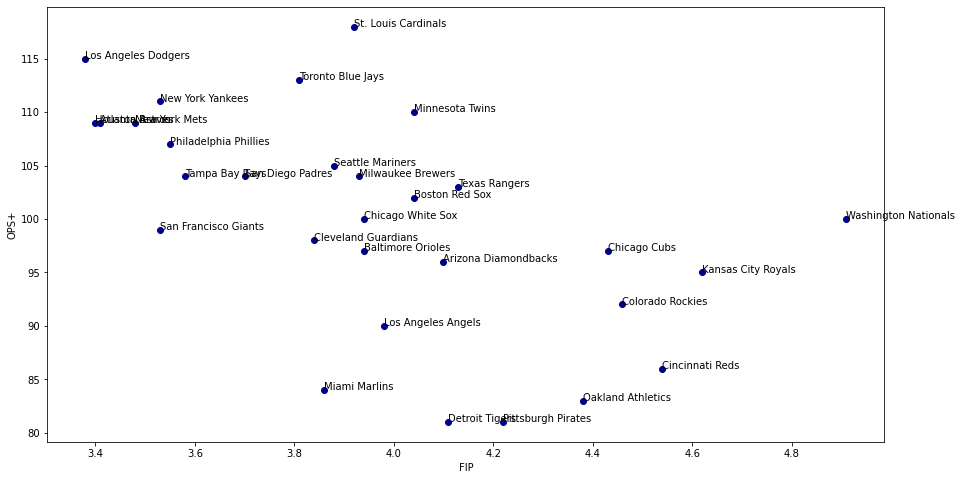

In [5]:
fig, ax = plt.subplots(figsize=(15,8))
# plot
ax.scatter(x=df_final['FIP'],y=df_final['OPS+'],c='DarkBlue')
texts = []
    
# set labels
ax.set_xlabel('FIP')
ax.set_ylabel('OPS+')

# annotate points in axis
for idx, row in df_final.iterrows():
    ax.annotate(row['Team'], (row['FIP'], row['OPS+']) ) 

# force matplotlib to draw the graph
plt.show()